In [1]:
import csv
import pandas as pd

def dataImport(path):
    data = pd.read_csv(path, encoding = "utf8", index_col=0, parse_dates=True)
    return(data)


In [2]:
%matplotlib inline

from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
path_ABT='C:/Users/niharika/Desktop/data sciences/Springboard/Capstone 2/Stock/ABT.csv'
data_ABT= dataImport(path_ABT)
data_ABT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-07-28,0.638281,0.643542,0.633020,0.640034,0.286761,2309500
1980-07-29,0.645295,0.655816,0.645295,0.655816,0.293831,2224000
1980-07-30,0.661077,0.683872,0.661077,0.675105,0.302474,4875700
1980-07-31,0.675105,0.675105,0.663049,0.675105,0.302474,3328800
1980-08-01,0.675105,0.687379,0.673351,0.677077,0.303357,5339000


In [4]:
A=data_ABT[['High']]
A.head()

,High
Date,
1980-07-28,0.643542
1980-07-29,0.655816
1980-07-30,0.683872
1980-07-31,0.675105
1980-08-01,0.687379


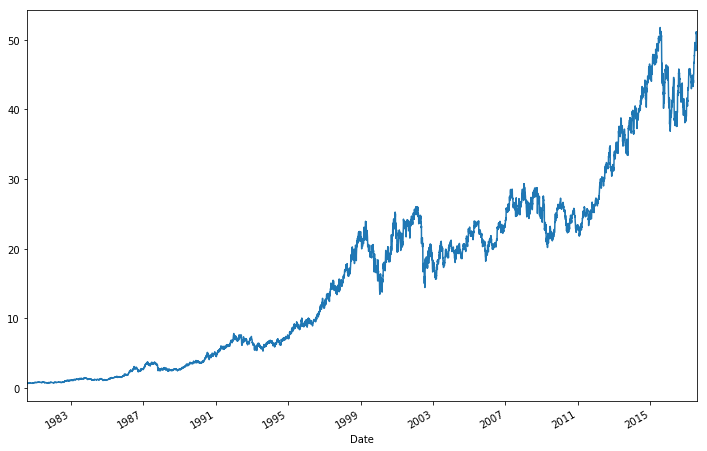

In [5]:
data_ABT['High'].plot(figsize=(12,8))

## Generate ACF plots for different lags p = {1,2,3…} and list down the top 5 optimal lags in sorted order of decreasing ACF. (Autocorrelation function)

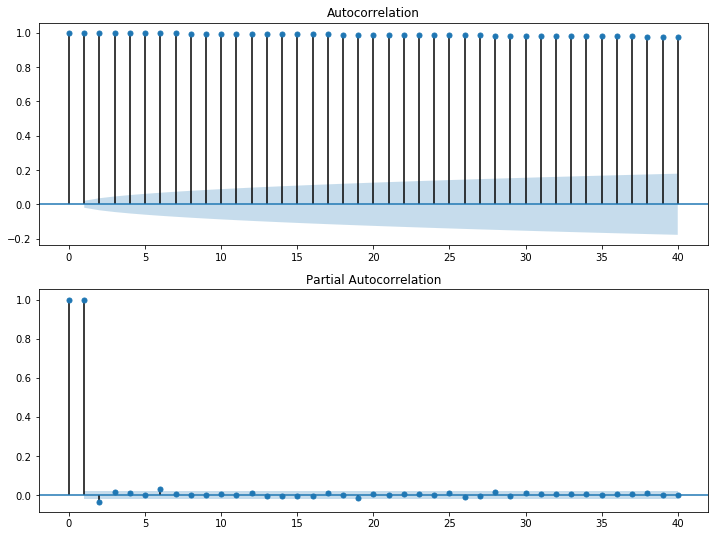

In [6]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_ABT['High'].values.squeeze(), lags=40, fft=True, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_ABT['High'], lags=40,ax=ax2)

### From the above autocorrelation fuction plot, we can deduce that p=1, p=2, p=3, p=4, p=5 are suitable lags, q=1, q=2

# Case1: p=1, q=1

In [7]:
arma_mod10 = sm.tsa.ARMA(A, (1,0)).fit(disp=False)
#print(arma_mod10.params)

In [8]:
print(arma_mod10.summary())

                              ARMA Model Results                              
Dep. Variable:                   High   No. Observations:                 9331
Model:                     ARMA(1, 0)   Log Likelihood                -594.729
Method:                       css-mle   S.D. of innovations              0.258
Date:                Tue, 01 Aug 2017   AIC                           1195.457
Time:                        14:37:23   BIC                           1216.880
Sample:                    07-28-1980   HQIC                          1202.734
                         - 07-26-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4213     18.934      1.237      0.216     -13.688      60.530
ar.L1.High     0.9999   8.78e-05   1.14e+04      0.000       1.000       1.000
                                    Roots           

In [9]:
sm.stats.durbin_watson(arma_mod10.resid.values) # measure of autocorrelation in the residuals (below 2 indicates auttocorreltaion)

1.4329453903135043

(-4, 3)

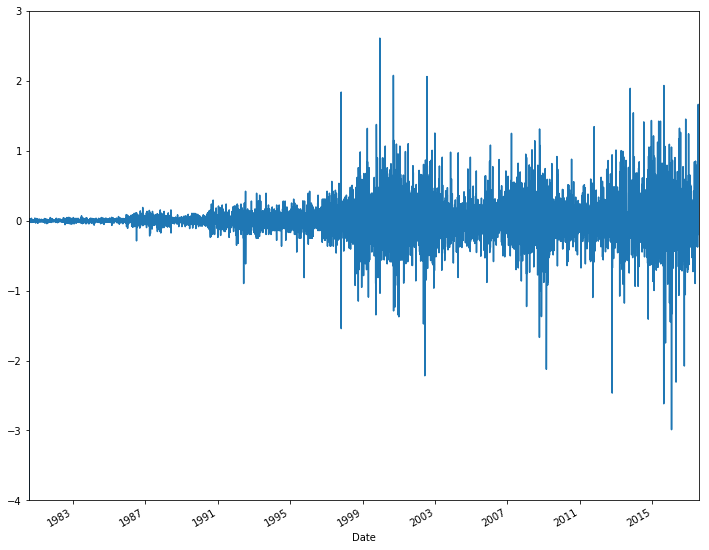

In [10]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax = arma_mod10.resid.plot(ax=ax);
ax.set_ylim([-4,+3])
ax.set_ylim([-4,+3])

In [11]:
#The Ljung–Box test is a type of statistical test of whether any of a 
#group of autocorrelations of a time series are different from zero
resid = arma_mod10.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.055614  28.869725  7.741349e-08
2.0  -0.023889  34.197146  3.751321e-08
3.0  -0.014225  36.086194  7.180647e-08
4.0  -0.003444  36.196947  2.635915e-07
5.0  -0.008129  36.813947  6.526476e-07
6.0   0.003611  36.935705  1.812441e-06
7.0  -0.009032  37.697634  3.458746e-06
8.0  -0.001598  37.721492  8.474580e-06
9.0   0.007774  38.286016  1.548753e-05
10.0 -0.004705  38.492849  3.113953e-05
11.0 -0.013874  40.291460  3.189249e-05
12.0  0.006982  40.747039  5.400841e-05
13.0  0.012664  42.245870  5.969900e-05
14.0 -0.001697  42.272782  1.118907e-04
15.0  0.001352  42.289875  2.027885e-04
16.0 -0.011223  43.467497  2.375498e-04
17.0 -0.002893  43.545777  3.994660e-04
18.0  0.018140  46.622787  2.405179e-04
19.0 -0.000092  46.622866  4.043076e-04
20.0 -0.000934  46.631017  6.598450e-04
21.0 -0.016171  49.077189  4.895848e-04
22.0 -0.005910  49.403981  7.055317e-04
23.0 -0.005378  49.674580  1.016277e-03


# Case1: p=2, q=1

In [12]:
#arma_mod20 = sm.tsa.ARMA(A, (2,1)).fit(start_params=[-0.5, -0.1,-0.1,0.2,0.1,0.1,0.5]transparams=False, disp=False)

In [13]:
sm.tsa.ARMA._fit_start_params?

In [14]:
print(arma_mod20.summary())

NameError: name 'arma_mod20' is not defined

In [ ]:
sm.stats.durbin_watson(arma_mod20.resid.values) # measure of autocorrelation in the residuals (below 2 indicates auttocorreltaion)

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);
ax.set_ylim([-4,+3])
ax.set_ylim([-4,+3])

In [ ]:
#The Ljung–Box test is a type of statistical test of whether any of a 
#group of autocorrelations of a time series are different from zero
resid = arma_mod20.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

In [ ]:
arma_mod30 = sm.tsa.ARMA(A, (3,0)).fit(disp=False)
print(arma_mod30.summary())

In [ ]:
sm.stats.durbin_watson(arma_mod30.resid.values) # measure of autocorrelation in the residuals (below 2 indicates auttocorreltaion)

In [ ]:
resid = arma_mod30.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

In [ ]:
arma_mod40 = sm.tsa.ARMA(A, (4,0)).fit(disp=False)
print(arma_mod40.summary())

In [ ]:
sm.stats.durbin_watson(arma_mod40.resid.values) # measure of autocorrelation in the residuals (below 2 indicates autocorreltaion)

In [ ]:
resid = arma_mod40.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

In [ ]:
arma_mod50 = sm.tsa.ARMA(A, (5,0)).fit(disp=False)
print(arma_mod50.summary())

In [ ]:
sm.stats.durbin_watson(arma_mod50.resid.values) # measure of autocorrelation in the residuals (below 2 indicates auttocorreltaion)

In [ ]:
resid = arma_mod50.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

In [ ]:
path_AMZN='C:/Users/niharika/Desktop/data sciences/Springboard/Capstone 2/Stock/AMZN.csv'
data_AMZN= dataImport(path_AMZN)
data_AMZN.head()

In [ ]:
B=data_AMZN[['High']]
B.head()

In [ ]:
path_Apple='C:/Users/niharika/Desktop/data sciences/Springboard/Capstone 2/Stock/appleDaily 1981-2017.csv'
data_Apple= dataImport(path_Apple)
data_Apple.head()

In [ ]:
C=data_Apple[['High']]
C.head()

In [ ]:
path_BP='C:/Users/niharika/Desktop/data sciences/Springboard/Capstone 2/Stock/BP.csv'
data_BP= dataImport(path_BP)
data_BP.head()

In [ ]:
D=data_BP[['High']]
D.head()

In [ ]:
path_FORD='C:/Users/niharika/Desktop/data sciences/Springboard/Capstone 2/Stock/fordMotorCompany1972-2017.csv'
data_FORD= dataImport(path_FORD)
data_FORD.head()

In [ ]:
E=data_FORD[['High']]
E.head()

In [ ]:
data_AMZN['High'].plot(figsize=(12,8))

In [ ]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_AMZN['High'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_AMZN['High'], lags=40, ax=ax2)

In [ ]:
data_Apple['High'].plot(figsize=(12,8))

In [ ]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_Apple['High'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_Apple['High'], lags=40, ax=ax2)

In [ ]:
data_BP['High'].plot(figsize=(12,8))

In [ ]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_BP['High'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_BP['High'], lags=40, ax=ax2)

In [ ]:
data_FORD['High'].plot(figsize=(12,8))

In [ ]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_FORD['High'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_FORD['High'], lags=40, ax=ax2)

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decomposition = seasonal_decompose(data_ABT.High, freq=12)

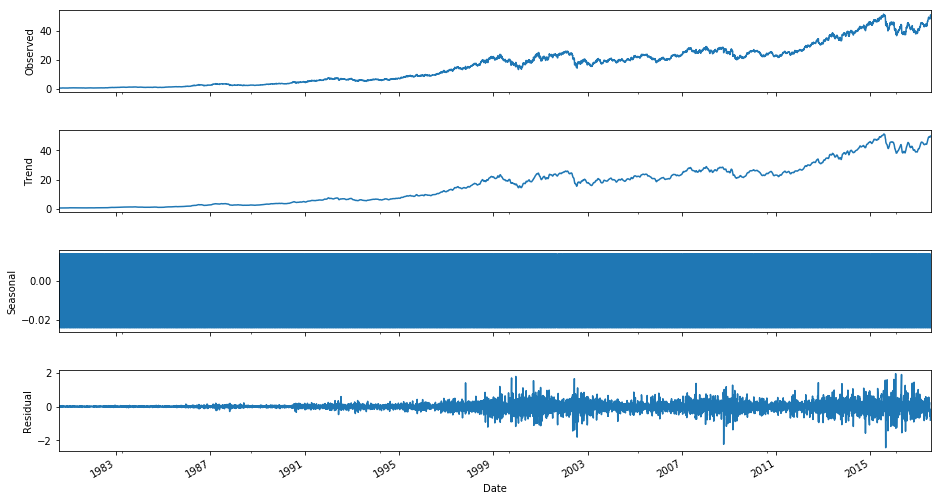

In [17]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


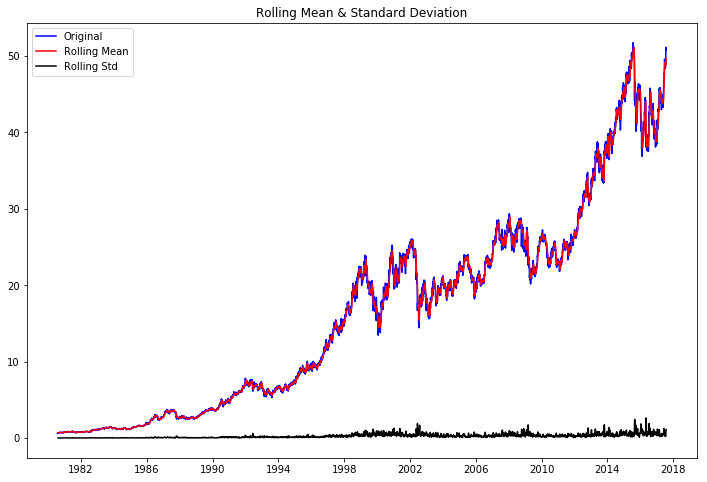

Results of Dickey-Fuller Test:
Test Statistic                    0.522096
p-value                           0.985529
#Lags Used                       38.000000
Number of Observations Used    9292.000000
Critical Value (1%)              -3.431054
Critical Value (5%)              -2.861851
Critical Value (10%)             -2.566936
dtype: float64


In [19]:
test_stationarity(data_ABT.High)

C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


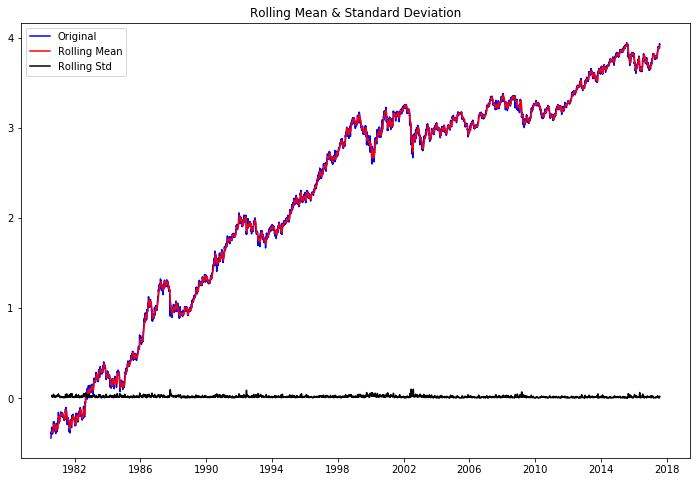

Results of Dickey-Fuller Test:
Test Statistic                   -1.877709
p-value                           0.342619
#Lags Used                       35.000000
Number of Observations Used    9295.000000
Critical Value (1%)              -3.431054
Critical Value (5%)              -2.861851
Critical Value (10%)             -2.566936
dtype: float64


In [20]:
data_ABT.High_log= data_ABT.High.apply(lambda x: np.log(x))  
test_stationarity(data_ABT.High_log)

In [22]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(data_ABT.High, trend='n', order=(1,0,1), seasonal_order=(1,0,1,12), enforce_stationarity=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               High   No. Observations:                 9331
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -542.568
Date:                            Tue, 01 Aug 2017   AIC                           1095.136
Time:                                    14:40:30   BIC                           1130.841
Sample:                                07-28-1980   HQIC                          1107.264
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0002   9.81e-05   1.02e+04      0.000       1.000       1.000
ma.L1          0.1122      0.005   